<a href="https://colab.research.google.com/github/SandipPalit/ML-CODES/blob/main/Classification/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from tabulate import tabulate

import warnings

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### Input Dataset

In [3]:
df = pd.read_csv('/content/weatherHistory.csv',low_memory=False)

In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Preprocessing

In [5]:
df.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [6]:
# removing Formatted Date, Daily Summary & Loud Cover columns.
df=df.drop(['Formatted Date','Daily Summary','Loud Cover'],axis=1)

In [7]:
# removing Null
df=df.dropna()

In [8]:
#sns.pairplot(df)

In [9]:
# frequency of 'Summary' column
df['Summary'].value_counts()

Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [10]:
# filtered 'Partly Cloudy', 'Mostly Cloudy', 'Overcast' and 'Clear' in 'Summary' column.
df=df[df['Summary'].isin(['Partly Cloudy','Mostly Cloudy','Overcast','Clear'])]

In [11]:
# Label Encoder
labelEncoder=LabelEncoder()
df['Summary']=labelEncoder.fit_transform(df[['Summary']])

print({l: i for i, l in enumerate(labelEncoder.classes_)})

{'Clear': 0, 'Mostly Cloudy': 1, 'Overcast': 2, 'Partly Cloudy': 3}


In [12]:
# One Hot Encoding
encoderP=OneHotEncoder(sparse=False)
dfP=pd.DataFrame(encoderP.fit_transform(df[['Precip Type']]))
dfP.columns = encoderP.get_feature_names_out(['Precip Type'])
dfP=dfP.drop(['Precip Type_snow'],axis=1)

df=df.drop(['Precip Type'],axis=1)

df= pd.concat([dfP, df ], axis=1)

In [13]:
# removing Null
df=df.dropna()

In [14]:
#Standardisation
standardScalerT=StandardScaler()
df['Temperature (C)']=standardScalerT.fit_transform(df[['Temperature (C)']])

standardScalerA=StandardScaler()
df['Apparent Temperature (C)']=standardScalerA.fit_transform(df[['Apparent Temperature (C)']])

standardScalerH=StandardScaler()
df['Humidity']=standardScalerH.fit_transform(df[['Humidity']])

standardScalerWS=StandardScaler()
df['Wind Speed (km/h)']=standardScalerWS.fit_transform(df[['Wind Speed (km/h)']])

standardScalerWB=StandardScaler()
df['Wind Bearing (degrees)']=standardScalerWB.fit_transform(df[['Wind Bearing (degrees)']])

standardScalerV=StandardScaler()
df['Visibility (km)']=standardScalerV.fit_transform(df[['Visibility (km)']])

standardScalerP=StandardScaler()
df['Pressure (millibars)']=standardScalerP.fit_transform(df[['Pressure (millibars)']])

In [15]:
df.head()

,Precip Type_rain,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,1.0,3.0,-0.354886,-0.420642,0.904773,0.555990,0.579911,1.422478,0.106370
1,1.0,3.0,-0.367344,-0.435983,0.748990,0.579173,0.654024,1.422478,0.110556
2,1.0,1.0,-0.364971,-0.231252,0.904773,-1.074531,0.144498,1.167353,0.113151
3,1.0,3.0,-0.481248,-0.558187,0.593206,0.553414,0.746665,1.422478,0.117086
4,1.0,1.0,-0.431415,-0.459789,0.593206,0.064000,0.654024,1.422478,0.117923


### Model Training

In [16]:
Y=df[['Summary']]
X=df.drop(['Summary'],axis=1)

In [17]:
X.head()

,Precip Type_rain,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,1.0,-0.354886,-0.420642,0.904773,0.555990,0.579911,1.422478,0.106370
1,1.0,-0.367344,-0.435983,0.748990,0.579173,0.654024,1.422478,0.110556
2,1.0,-0.364971,-0.231252,0.904773,-1.074531,0.144498,1.167353,0.113151
3,1.0,-0.481248,-0.558187,0.593206,0.553414,0.746665,1.422478,0.117086
4,1.0,-0.431415,-0.459789,0.593206,0.064000,0.654024,1.422478,0.117923


In [18]:
Y.head()

,Summary
0,3.0
1,3.0
2,1.0
3,3.0
4,1.0


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Logistic Regression

In [20]:
claLR=LogisticRegression()
claLR.fit(X_train,Y_train)
yPredClaLR=claLR.predict(X_test)
accuracy_score(yPredClaLR, Y_test)

0.46766551415033936

### K Nearest Neighbours Classification

In [21]:
claKNC=KNeighborsClassifier()
claKNC.fit(X_train,Y_train)
yPredClaKNC=claKNC.predict(X_test)
accuracy_score(yPredClaKNC, Y_test)

0.4556281213983865

### Support Vector Machine Classification

In [22]:
claSVC=SVC()
claSVC.fit(X_train,Y_train)
yPredClaSVC=claSVC.predict(X_test)
accuracy_score(yPredClaSVC, Y_test)

0.49052375464207965

### Decision Tree Classification

In [23]:
claDTC=DecisionTreeClassifier()
claDTC.fit(X_train,Y_train)
yPredClaDTC=claDTC.predict(X_test)
accuracy_score(yPredClaDTC, Y_test)

0.4522346011012934

### Random Forest Classification

In [24]:
claRFC=RandomForestClassifier()
claRFC.fit(X_train,Y_train)
yPredClaRFC=claRFC.predict(X_test)
accuracy_score(yPredClaRFC, Y_test)

0.5577538737354335

### Model Evaluation

In [25]:
data=[
     ["Logistic Regression",round(accuracy_score(yPredClaLR, Y_test),5)],
     ["K Nearest Neighbours Classification",round(accuracy_score(yPredClaKNC, Y_test),5)],
     ["Support Vector Machine Classification",round(accuracy_score(yPredClaSVC, Y_test),5)],
     ["Decision Tree Classification",round(accuracy_score(yPredClaDTC, Y_test),5)],
     ["Random Forest Classification",round(accuracy_score(yPredClaRFC, Y_test),5)] 
    ]
columns=["Model Name","Accuracy"]

print(tabulate(data, headers=columns, tablefmt="fancy_grid"))

╒═══════════════════════════════════════╤════════════╕
│ Model Name                            │   Accuracy │
╞═══════════════════════════════════════╪════════════╡
│ Logistic Regression                   │    0.46767 │
├───────────────────────────────────────┼────────────┤
│ K Nearest Neighbours Classification   │    0.45563 │
├───────────────────────────────────────┼────────────┤
│ Support Vector Machine Classification │    0.49052 │
├───────────────────────────────────────┼────────────┤
│ Decision Tree Classification          │    0.45223 │
├───────────────────────────────────────┼────────────┤
│ Random Forest Classification          │    0.55775 │
╘═══════════════════════════════════════╧════════════╛


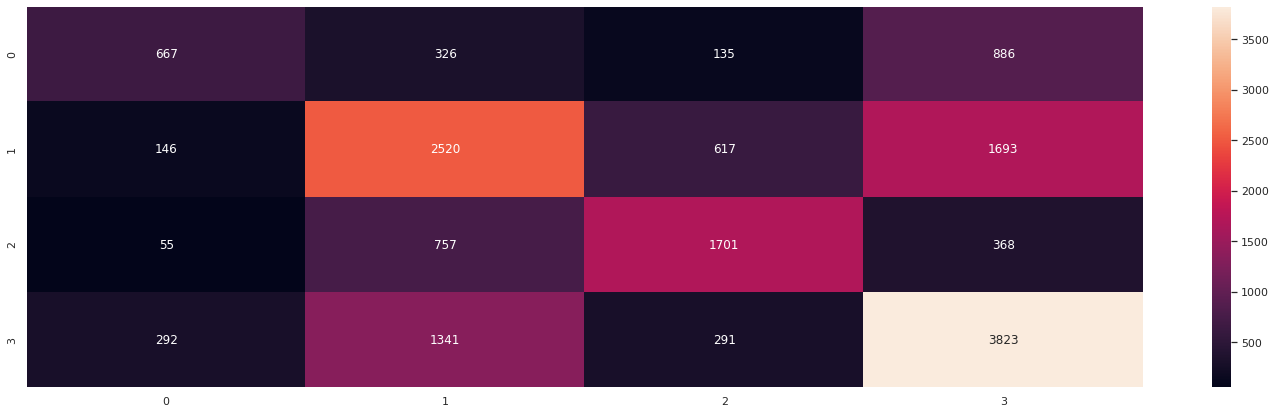

In [26]:
# Random Forest Classification
sns.set(rc={'figure.figsize':(25,7)})
sns.heatmap(confusion_matrix(Y_test, yPredClaRFC),annot=True, fmt='g')